In [1]:
import pandas as pd
import numpy as np
import re
odf1 = pd.read_csv("OpenKontiLUQS_O3_2010-2019.csv", sep =  ";", skiprows = 2)
np.random.seed(0)



In [2]:
odf1

,Datum,Zeit,AABU O3 1H Mittelwert [�g/m�],BIEL O3 1H Mittelwert [�g/m�],BORG O3 1H Mittelwert [�g/m�],BOTT O3 1H Mittelwert [�g/m�],CHOR O3 1H Mittelwert [�g/m�],DMD2 O3 1H Mittelwert [�g/m�],DWER O3 1H Mittelwert [�g/m�],EIFE O3 1H Mittelwert [�g/m�],...,ROTH O3 1H Mittelwert [�g/m�],SHW2 O3 1H Mittelwert [�g/m�],SICK O3 1H Mittelwert [�g/m�],SOES O3 1H Mittelwert [�g/m�],SOLI O3 1H Mittelwert [�g/m�],STYR O3 1H Mittelwert [�g/m�],VESN O3 1H Mittelwert [�g/m�],WALS O3 1H Mittelwert [�g/m�],WESE O3 1H Mittelwert [�g/m�],WULA O3 1H Mittelwert [�g/m�]
0,01.01.2010,01:00,13.0,NaN,54.0,24.0,NaN,20.0,NaN,18.0,...,4.0,44.0,41.0,45.0,20.0,NaN,NaN,31.0,52.0,NaN
1,01.01.2010,02:00,20.0,43.0,56.0,38.0,19.0,34.0,NaN,19.0,...,6.0,42.0,NaN,47.0,30.0,33.0,NaN,44.0,53.0,33.0
2,01.01.2010,03:00,28.0,44.0,59.0,43.0,22.0,38.0,NaN,25.0,...,11.0,41.0,54.0,48.0,28.0,43.0,NaN,46.0,57.0,34.0
3,01.01.2010,04:00,31.0,47.0,62.0,44.0,20.0,35.0,NaN,NaN,...,18.0,43.0,54.0,NaN,36.0,42.0,NaN,48.0,58.0,39.0
4,01.01.2010,05:00,28.0,50.0,NaN,46.0,29.0,39.0,NaN,26.0,...,23.0,43.0,56.0,50.0,40.0,39.0,NaN,47.0,59.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,5.0,20.0,33.0,37.0,5.0,53.0,6.0,18.0,...,42.0,48.0,4.0,49.0,32.0,30.0,NaN,4.0,6.0,37.0
87644,31.12.2019,21:00,4.0,19.0,21.0,39.0,4.0,50.0,4.0,31.0,...,51.0,35.0,4.0,47.0,30.0,19.0,NaN,4.0,4.0,13.0
87645,31.12.2019,22:00,8.0,18.0,33.0,27.0,4.0,39.0,4.0,35.0,...,58.0,25.0,4.0,41.0,35.0,20.0,NaN,4.0,4.0,4.0
87646,31.12.2019,23:00,9.0,26.0,27.0,13.0,4.0,36.0,NaN,NaN,...,61.0,NaN,5.0,39.0,28.0,NaN,NaN,4.0,4.0,4.0


In [3]:
odf1.columns

Index(['Datum', 'Zeit', 'AABU O3 1H Mittelwert [�g/m�]',
       'BIEL O3 1H Mittelwert [�g/m�]', 'BORG O3 1H Mittelwert [�g/m�]',
       'BOTT O3 1H Mittelwert [�g/m�]', 'CHOR O3 1H Mittelwert [�g/m�]',
       'DMD2 O3 1H Mittelwert [�g/m�]', 'DWER O3 1H Mittelwert [�g/m�]',
       'EIFE O3 1H Mittelwert [�g/m�]', 'ELAN O3 1H Mittelwert [�g/m�]',
       'HUE2 O3 1H Mittelwert [�g/m�]', 'KREF O3 1H Mittelwert [�g/m�]',
       'LEV2 O3 1H Mittelwert [�g/m�]', 'LOER O3 1H Mittelwert [�g/m�]',
       'MGRH O3 1H Mittelwert [�g/m�]', 'MSGE O3 1H Mittelwert [�g/m�]',
       'NIED O3 1H Mittelwert [�g/m�]', 'NIZI O3 1H Mittelwert [�g/m�]',
       'RAT2 O3 1H Mittelwert [�g/m�]', 'RODE O3 1H Mittelwert [�g/m�]',
       'ROTH O3 1H Mittelwert [�g/m�]', 'SHW2 O3 1H Mittelwert [�g/m�]',
       'SICK O3 1H Mittelwert [�g/m�]', 'SOES O3 1H Mittelwert [�g/m�]',
       'SOLI O3 1H Mittelwert [�g/m�]', 'STYR O3 1H Mittelwert [�g/m�]',
       'VESN O3 1H Mittelwert [�g/m�]', 'WALS O3 1H Mittelwert [�g/

In [4]:
odf1.fillna(0 , inplace = True)

In [5]:
odf1

,Datum,Zeit,AABU O3 1H Mittelwert [�g/m�],BIEL O3 1H Mittelwert [�g/m�],BORG O3 1H Mittelwert [�g/m�],BOTT O3 1H Mittelwert [�g/m�],CHOR O3 1H Mittelwert [�g/m�],DMD2 O3 1H Mittelwert [�g/m�],DWER O3 1H Mittelwert [�g/m�],EIFE O3 1H Mittelwert [�g/m�],...,ROTH O3 1H Mittelwert [�g/m�],SHW2 O3 1H Mittelwert [�g/m�],SICK O3 1H Mittelwert [�g/m�],SOES O3 1H Mittelwert [�g/m�],SOLI O3 1H Mittelwert [�g/m�],STYR O3 1H Mittelwert [�g/m�],VESN O3 1H Mittelwert [�g/m�],WALS O3 1H Mittelwert [�g/m�],WESE O3 1H Mittelwert [�g/m�],WULA O3 1H Mittelwert [�g/m�]
0,01.01.2010,01:00,13.0,0.0,54.0,24.0,0.0,20.0,0.0,18.0,...,4.0,44.0,41.0,45.0,20.0,0.0,0.0,31.0,52.0,0.0
1,01.01.2010,02:00,20.0,43.0,56.0,38.0,19.0,34.0,0.0,19.0,...,6.0,42.0,0.0,47.0,30.0,33.0,0.0,44.0,53.0,33.0
2,01.01.2010,03:00,28.0,44.0,59.0,43.0,22.0,38.0,0.0,25.0,...,11.0,41.0,54.0,48.0,28.0,43.0,0.0,46.0,57.0,34.0
3,01.01.2010,04:00,31.0,47.0,62.0,44.0,20.0,35.0,0.0,0.0,...,18.0,43.0,54.0,0.0,36.0,42.0,0.0,48.0,58.0,39.0
4,01.01.2010,05:00,28.0,50.0,0.0,46.0,29.0,39.0,0.0,26.0,...,23.0,43.0,56.0,50.0,40.0,39.0,0.0,47.0,59.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,5.0,20.0,33.0,37.0,5.0,53.0,6.0,18.0,...,42.0,48.0,4.0,49.0,32.0,30.0,0.0,4.0,6.0,37.0
87644,31.12.2019,21:00,4.0,19.0,21.0,39.0,4.0,50.0,4.0,31.0,...,51.0,35.0,4.0,47.0,30.0,19.0,0.0,4.0,4.0,13.0
87645,31.12.2019,22:00,8.0,18.0,33.0,27.0,4.0,39.0,4.0,35.0,...,58.0,25.0,4.0,41.0,35.0,20.0,0.0,4.0,4.0,4.0
87646,31.12.2019,23:00,9.0,26.0,27.0,13.0,4.0,36.0,0.0,0.0,...,61.0,0.0,5.0,39.0,28.0,0.0,0.0,4.0,4.0,4.0


In [6]:
odf_col=['Datum',
'Zeit',
'Aachen',
'Bielefeld',
'Borken',
'Bottrop',
'Cologne1',
'Dortmund',
'Duesseldorf1',
'Simmerath',
'Essen1',
'Huerth',
'Krefeld',
'Leverkusen',
'Duesseldorf2',
'Moenchengladbach',
'Muenster1',
'Luenen',
'Niederzier',
'Ratingen',
'Cologne2',
'Netphen',
'Schwerte',
'Marl',
'Soest',
'Solingen',
'Muelheim',
'Essen2',
'Duisburg',
'Muenster2',
'Wuppertal']

In [7]:
odf_col

['Datum',
 'Zeit',
 'Aachen',
 'Bielefeld',
 'Borken',
 'Bottrop',
 'Cologne1',
 'Dortmund',
 'Duesseldorf1',
 'Simmerath',
 'Essen1',
 'Huerth',
 'Krefeld',
 'Leverkusen',
 'Duesseldorf2',
 'Moenchengladbach',
 'Muenster1',
 'Luenen',
 'Niederzier',
 'Ratingen',
 'Cologne2',
 'Netphen',
 'Schwerte',
 'Marl',
 'Soest',
 'Solingen',
 'Muelheim',
 'Essen2',
 'Duisburg',
 'Muenster2',
 'Wuppertal']

In [8]:
odf1.columns = odf_col

In [9]:
odf1

,Datum,Zeit,Aachen,Bielefeld,Borken,Bottrop,Cologne1,Dortmund,Duesseldorf1,Simmerath,...,Netphen,Schwerte,Marl,Soest,Solingen,Muelheim,Essen2,Duisburg,Muenster2,Wuppertal
0,01.01.2010,01:00,13.0,0.0,54.0,24.0,0.0,20.0,0.0,18.0,...,4.0,44.0,41.0,45.0,20.0,0.0,0.0,31.0,52.0,0.0
1,01.01.2010,02:00,20.0,43.0,56.0,38.0,19.0,34.0,0.0,19.0,...,6.0,42.0,0.0,47.0,30.0,33.0,0.0,44.0,53.0,33.0
2,01.01.2010,03:00,28.0,44.0,59.0,43.0,22.0,38.0,0.0,25.0,...,11.0,41.0,54.0,48.0,28.0,43.0,0.0,46.0,57.0,34.0
3,01.01.2010,04:00,31.0,47.0,62.0,44.0,20.0,35.0,0.0,0.0,...,18.0,43.0,54.0,0.0,36.0,42.0,0.0,48.0,58.0,39.0
4,01.01.2010,05:00,28.0,50.0,0.0,46.0,29.0,39.0,0.0,26.0,...,23.0,43.0,56.0,50.0,40.0,39.0,0.0,47.0,59.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,5.0,20.0,33.0,37.0,5.0,53.0,6.0,18.0,...,42.0,48.0,4.0,49.0,32.0,30.0,0.0,4.0,6.0,37.0
87644,31.12.2019,21:00,4.0,19.0,21.0,39.0,4.0,50.0,4.0,31.0,...,51.0,35.0,4.0,47.0,30.0,19.0,0.0,4.0,4.0,13.0
87645,31.12.2019,22:00,8.0,18.0,33.0,27.0,4.0,39.0,4.0,35.0,...,58.0,25.0,4.0,41.0,35.0,20.0,0.0,4.0,4.0,4.0
87646,31.12.2019,23:00,9.0,26.0,27.0,13.0,4.0,36.0,0.0,0.0,...,61.0,0.0,5.0,39.0,28.0,0.0,0.0,4.0,4.0,4.0


In [10]:
odf_sorted_col=['Datum',
'Zeit',
'Aachen',
'Bielefeld',
'Borken',
'Bottrop',
'Cologne1',
'Cologne2',
'Dortmund',
'Duesseldorf1',
'Duesseldorf2',
'Simmerath',
'Essen1',
'Essen2',
'Huerth',
'Krefeld',
'Leverkusen',
'Moenchengladbach',
'Muenster1',
'Muenster2',
'Luenen',
'Niederzier',
'Ratingen',
'Netphen',
'Schwerte',
'Marl',
'Soest',
'Solingen',
'Muelheim',
'Duisburg',
'Wuppertal']

In [11]:
odf1 = odf1[odf_sorted_col]

In [12]:
odf1

,Datum,Zeit,Aachen,Bielefeld,Borken,Bottrop,Cologne1,Cologne2,Dortmund,Duesseldorf1,...,Niederzier,Ratingen,Netphen,Schwerte,Marl,Soest,Solingen,Muelheim,Duisburg,Wuppertal
0,01.01.2010,01:00,13.0,0.0,54.0,24.0,0.0,4.0,20.0,0.0,...,22.0,24.0,4.0,44.0,41.0,45.0,20.0,0.0,31.0,0.0
1,01.01.2010,02:00,20.0,43.0,56.0,38.0,19.0,4.0,34.0,0.0,...,30.0,25.0,6.0,42.0,0.0,47.0,30.0,33.0,44.0,33.0
2,01.01.2010,03:00,28.0,44.0,59.0,43.0,22.0,4.0,38.0,0.0,...,30.0,33.0,11.0,41.0,54.0,48.0,28.0,43.0,46.0,34.0
3,01.01.2010,04:00,31.0,47.0,62.0,44.0,20.0,4.0,35.0,0.0,...,28.0,38.0,18.0,43.0,54.0,0.0,36.0,42.0,48.0,39.0
4,01.01.2010,05:00,28.0,50.0,0.0,46.0,29.0,4.0,39.0,0.0,...,35.0,40.0,23.0,43.0,56.0,50.0,40.0,39.0,47.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,5.0,20.0,33.0,37.0,5.0,4.0,53.0,6.0,...,4.0,24.0,42.0,48.0,4.0,49.0,32.0,30.0,4.0,37.0
87644,31.12.2019,21:00,4.0,19.0,21.0,39.0,4.0,4.0,50.0,4.0,...,4.0,9.0,51.0,35.0,4.0,47.0,30.0,19.0,4.0,13.0
87645,31.12.2019,22:00,8.0,18.0,33.0,27.0,4.0,4.0,39.0,4.0,...,4.0,4.0,58.0,25.0,4.0,41.0,35.0,20.0,4.0,4.0
87646,31.12.2019,23:00,9.0,26.0,27.0,13.0,4.0,7.0,36.0,0.0,...,4.0,4.0,61.0,0.0,5.0,39.0,28.0,0.0,4.0,4.0


In [13]:
odf1['Cologne'] = odf1.loc[: , "Cologne1":"Cologne2"].mean(axis = 1)
odf1['Duesseldorf'] = odf1.loc[: , "Duesseldorf1":"Duesseldorf2"].mean(axis = 1)
odf1['Essen'] = odf1.loc[: , "Essen1":"Essen2"].mean(axis = 1)
odf1['Muenster'] = odf1.loc[: , "Muenster1":"Muenster2"].mean(axis = 1)

<ipython-input-13-e9fd60f08812>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odf1['Cologne'] = odf1.loc[: , "Cologne1":"Cologne2"].mean(axis = 1)
<ipython-input-13-e9fd60f08812>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odf1['Duesseldorf'] = odf1.loc[: , "Duesseldorf1":"Duesseldorf2"].mean(axis = 1)
<ipython-input-13-e9fd60f08812>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [14]:
odf1.columns

Index(['Datum', 'Zeit', 'Aachen', 'Bielefeld', 'Borken', 'Bottrop', 'Cologne1',
       'Cologne2', 'Dortmund', 'Duesseldorf1', 'Duesseldorf2', 'Simmerath',
       'Essen1', 'Essen2', 'Huerth', 'Krefeld', 'Leverkusen',
       'Moenchengladbach', 'Muenster1', 'Muenster2', 'Luenen', 'Niederzier',
       'Ratingen', 'Netphen', 'Schwerte', 'Marl', 'Soest', 'Solingen',
       'Muelheim', 'Duisburg', 'Wuppertal', 'Cologne', 'Duesseldorf', 'Essen',
       'Muenster'],
      dtype='object')

In [15]:
odf1.drop(['Cologne1',
       'Cologne2','Duesseldorf1', 'Duesseldorf2','Essen1', 'Essen2','Muenster1', 'Muenster2'], axis = 1, inplace = True) 

C:\Users\anuph\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
odf1

,Datum,Zeit,Aachen,Bielefeld,Borken,Bottrop,Dortmund,Simmerath,Huerth,Krefeld,...,Marl,Soest,Solingen,Muelheim,Duisburg,Wuppertal,Cologne,Duesseldorf,Essen,Muenster
0,01.01.2010,01:00,13.0,0.0,54.0,24.0,20.0,18.0,15.0,30.0,...,41.0,45.0,20.0,0.0,31.0,0.0,2.0,0.0,11.0,43.5
1,01.01.2010,02:00,20.0,43.0,56.0,38.0,34.0,19.0,0.0,27.0,...,0.0,47.0,30.0,33.0,44.0,33.0,11.5,12.0,12.0,50.5
2,01.01.2010,03:00,28.0,44.0,59.0,43.0,38.0,25.0,19.0,36.0,...,54.0,48.0,28.0,43.0,46.0,34.0,13.0,17.0,18.0,52.5
3,01.01.2010,04:00,31.0,47.0,62.0,44.0,35.0,0.0,17.0,0.0,...,54.0,0.0,36.0,42.0,48.0,39.0,12.0,20.5,18.5,54.0
4,01.01.2010,05:00,28.0,50.0,0.0,46.0,39.0,26.0,19.0,43.0,...,56.0,50.0,40.0,39.0,47.0,41.0,16.5,19.5,19.5,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,5.0,20.0,33.0,37.0,53.0,18.0,4.0,39.0,...,4.0,49.0,32.0,30.0,4.0,37.0,4.5,15.0,29.5,7.5
87644,31.12.2019,21:00,4.0,19.0,21.0,39.0,50.0,31.0,4.0,33.0,...,4.0,47.0,30.0,19.0,4.0,13.0,4.0,7.0,24.0,8.0
87645,31.12.2019,22:00,8.0,18.0,33.0,27.0,39.0,35.0,4.0,29.0,...,4.0,41.0,35.0,20.0,4.0,4.0,4.0,6.5,24.0,4.0
87646,31.12.2019,23:00,9.0,26.0,27.0,13.0,36.0,0.0,5.0,12.0,...,5.0,39.0,28.0,0.0,4.0,4.0,5.5,4.5,26.5,4.0


In [17]:
odf1['Datum'] = pd.to_datetime(odf1.Datum)

<ipython-input-17-a8c6db6d2f05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odf1['Datum'] = pd.to_datetime(odf1.Datum)


In [18]:
odf1.dtypes

Datum               datetime64[ns]
Zeit                        object
Aachen                     float64
Bielefeld                  float64
Borken                     float64
Bottrop                    float64
Dortmund                   float64
Simmerath                  float64
Huerth                     float64
Krefeld                    float64
Leverkusen                 float64
Moenchengladbach           float64
Luenen                     float64
Niederzier                 float64
Ratingen                   float64
Netphen                    float64
Schwerte                   float64
Marl                       float64
Soest                      float64
Solingen                   float64
Muelheim                   float64
Duisburg                   float64
Wuppertal                  float64
Cologne                    float64
Duesseldorf                float64
Essen                      float64
Muenster                   float64
dtype: object

In [19]:
odf1['Year'] = odf1.Datum.dt.year

<ipython-input-19-3294c0258dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odf1['Year'] = odf1.Datum.dt.year


In [20]:
odf1

,Datum,Zeit,Aachen,Bielefeld,Borken,Bottrop,Dortmund,Simmerath,Huerth,Krefeld,...,Soest,Solingen,Muelheim,Duisburg,Wuppertal,Cologne,Duesseldorf,Essen,Muenster,Year
0,2010-01-01,01:00,13.0,0.0,54.0,24.0,20.0,18.0,15.0,30.0,...,45.0,20.0,0.0,31.0,0.0,2.0,0.0,11.0,43.5,2010
1,2010-01-01,02:00,20.0,43.0,56.0,38.0,34.0,19.0,0.0,27.0,...,47.0,30.0,33.0,44.0,33.0,11.5,12.0,12.0,50.5,2010
2,2010-01-01,03:00,28.0,44.0,59.0,43.0,38.0,25.0,19.0,36.0,...,48.0,28.0,43.0,46.0,34.0,13.0,17.0,18.0,52.5,2010
3,2010-01-01,04:00,31.0,47.0,62.0,44.0,35.0,0.0,17.0,0.0,...,0.0,36.0,42.0,48.0,39.0,12.0,20.5,18.5,54.0,2010
4,2010-01-01,05:00,28.0,50.0,0.0,46.0,39.0,26.0,19.0,43.0,...,50.0,40.0,39.0,47.0,41.0,16.5,19.5,19.5,55.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2019-12-31,20:00,5.0,20.0,33.0,37.0,53.0,18.0,4.0,39.0,...,49.0,32.0,30.0,4.0,37.0,4.5,15.0,29.5,7.5,2019
87644,2019-12-31,21:00,4.0,19.0,21.0,39.0,50.0,31.0,4.0,33.0,...,47.0,30.0,19.0,4.0,13.0,4.0,7.0,24.0,8.0,2019
87645,2019-12-31,22:00,8.0,18.0,33.0,27.0,39.0,35.0,4.0,29.0,...,41.0,35.0,20.0,4.0,4.0,4.0,6.5,24.0,4.0,2019
87646,2019-12-31,23:00,9.0,26.0,27.0,13.0,36.0,0.0,5.0,12.0,...,39.0,28.0,0.0,4.0,4.0,5.5,4.5,26.5,4.0,2019


In [21]:
odf1.drop(['Datum'],axis = 1, inplace = True)

C:\Users\anuph\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
odf1

,Zeit,Aachen,Bielefeld,Borken,Bottrop,Dortmund,Simmerath,Huerth,Krefeld,Leverkusen,...,Soest,Solingen,Muelheim,Duisburg,Wuppertal,Cologne,Duesseldorf,Essen,Muenster,Year
0,01:00,13.0,0.0,54.0,24.0,20.0,18.0,15.0,30.0,7.0,...,45.0,20.0,0.0,31.0,0.0,2.0,0.0,11.0,43.5,2010
1,02:00,20.0,43.0,56.0,38.0,34.0,19.0,0.0,27.0,13.0,...,47.0,30.0,33.0,44.0,33.0,11.5,12.0,12.0,50.5,2010
2,03:00,28.0,44.0,59.0,43.0,38.0,25.0,19.0,36.0,17.0,...,48.0,28.0,43.0,46.0,34.0,13.0,17.0,18.0,52.5,2010
3,04:00,31.0,47.0,62.0,44.0,35.0,0.0,17.0,0.0,18.0,...,0.0,36.0,42.0,48.0,39.0,12.0,20.5,18.5,54.0,2010
4,05:00,28.0,50.0,0.0,46.0,39.0,26.0,19.0,43.0,28.0,...,50.0,40.0,39.0,47.0,41.0,16.5,19.5,19.5,55.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,20:00,5.0,20.0,33.0,37.0,53.0,18.0,4.0,39.0,4.0,...,49.0,32.0,30.0,4.0,37.0,4.5,15.0,29.5,7.5,2019
87644,21:00,4.0,19.0,21.0,39.0,50.0,31.0,4.0,33.0,4.0,...,47.0,30.0,19.0,4.0,13.0,4.0,7.0,24.0,8.0,2019
87645,22:00,8.0,18.0,33.0,27.0,39.0,35.0,4.0,29.0,4.0,...,41.0,35.0,20.0,4.0,4.0,4.0,6.5,24.0,4.0,2019
87646,23:00,9.0,26.0,27.0,13.0,36.0,0.0,5.0,12.0,4.0,...,39.0,28.0,0.0,4.0,4.0,5.5,4.5,26.5,4.0,2019


In [23]:
odf1.drop(['Zeit'], axis = 1, inplace = True)

C:\Users\anuph\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
odf1

,Aachen,Bielefeld,Borken,Bottrop,Dortmund,Simmerath,Huerth,Krefeld,Leverkusen,Moenchengladbach,...,Soest,Solingen,Muelheim,Duisburg,Wuppertal,Cologne,Duesseldorf,Essen,Muenster,Year
0,13.0,0.0,54.0,24.0,20.0,18.0,15.0,30.0,7.0,0.0,...,45.0,20.0,0.0,31.0,0.0,2.0,0.0,11.0,43.5,2010
1,20.0,43.0,56.0,38.0,34.0,19.0,0.0,27.0,13.0,26.0,...,47.0,30.0,33.0,44.0,33.0,11.5,12.0,12.0,50.5,2010
2,28.0,44.0,59.0,43.0,38.0,25.0,19.0,36.0,17.0,28.0,...,48.0,28.0,43.0,46.0,34.0,13.0,17.0,18.0,52.5,2010
3,31.0,47.0,62.0,44.0,35.0,0.0,17.0,0.0,18.0,31.0,...,0.0,36.0,42.0,48.0,39.0,12.0,20.5,18.5,54.0,2010
4,28.0,50.0,0.0,46.0,39.0,26.0,19.0,43.0,28.0,32.0,...,50.0,40.0,39.0,47.0,41.0,16.5,19.5,19.5,55.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,5.0,20.0,33.0,37.0,53.0,18.0,4.0,39.0,4.0,21.0,...,49.0,32.0,30.0,4.0,37.0,4.5,15.0,29.5,7.5,2019
87644,4.0,19.0,21.0,39.0,50.0,31.0,4.0,33.0,4.0,16.0,...,47.0,30.0,19.0,4.0,13.0,4.0,7.0,24.0,8.0,2019
87645,8.0,18.0,33.0,27.0,39.0,35.0,4.0,29.0,4.0,11.0,...,41.0,35.0,20.0,4.0,4.0,4.0,6.5,24.0,4.0,2019
87646,9.0,26.0,27.0,13.0,36.0,0.0,5.0,12.0,4.0,7.0,...,39.0,28.0,0.0,4.0,4.0,5.5,4.5,26.5,4.0,2019


In [25]:
odf1[odf1.Year == 2010 ].mean()

Aachen                44.481507
Bielefeld             39.693037
Borken                40.809475
Bottrop               33.940753
Dortmund              35.158904
Simmerath             51.516667
Huerth                39.074429
Krefeld               36.415868
Leverkusen            30.946689
Moenchengladbach      35.404224
Luenen                36.911986
Niederzier            42.641667
Ratingen              34.960731
Netphen               60.764155
Schwerte              37.400571
Marl                  37.812785
Soest                 44.469178
Solingen              42.418265
Muelheim              34.168950
Duisburg              32.531735
Wuppertal             36.135845
Cologne               31.256336
Duesseldorf           16.717295
Essen                 16.756564
Muenster              37.327340
Year                2010.000000
dtype: float64

In [26]:
odf1.to_csv('O3_beta.csv')

In [27]:
odf2 = odf1.groupby("Year").mean()


In [28]:
odf2

,Aachen,Bielefeld,Borken,Bottrop,Dortmund,Simmerath,Huerth,Krefeld,Leverkusen,Moenchengladbach,...,Marl,Soest,Solingen,Muelheim,Duisburg,Wuppertal,Cologne,Duesseldorf,Essen,Muenster
Year,,,,,,,,,,,,,,,,,,,,,
2010,44.481507,39.693037,40.809475,33.940753,35.158904,51.516667,39.074429,36.415868,30.946689,35.404224,...,37.812785,44.469178,42.418265,34.168950,32.531735,36.135845,31.256336,16.717295,16.756564,37.327340
2011,44.609817,38.361073,39.190183,31.561187,34.035959,53.700342,35.865753,36.101598,30.169292,34.658219,...,37.266781,43.426941,41.659361,33.238813,33.685046,35.708562,31.074600,16.395605,17.536644,38.626655
2012,45.955715,38.909039,39.064663,34.297814,36.068192,51.745674,39.917464,36.031193,30.232354,35.825023,...,37.641849,39.906535,41.701617,34.438525,34.521630,35.711521,32.062898,17.100239,31.862079,38.360997
2013,45.936530,38.745091,43.684589,35.796461,36.146575,54.155251,41.496005,38.064954,32.948858,37.363242,...,40.021005,43.508219,43.732648,36.184132,37.185731,37.861073,33.551598,17.567637,35.033676,40.986016
2014,45.573059,37.879680,39.916210,33.842694,34.075000,52.384018,39.764726,36.887900,29.891781,36.058447,...,35.877055,42.638014,44.338128,35.524658,34.104224,37.155479,32.517409,17.559703,34.155708,37.235959
2015,46.173858,42.188584,43.733562,36.900114,39.529566,54.572945,44.109132,41.515982,34.550799,38.954566,...,41.032306,46.666553,46.428311,38.116553,37.329338,39.893721,36.144064,19.540297,19.344406,41.958619
2016,44.277436,36.646972,39.829690,34.436703,36.502618,53.313980,38.855988,38.928620,31.380806,35.653005,...,38.005351,42.501366,43.389458,35.964367,35.741462,36.651070,33.553791,18.227630,18.380920,39.251025
2017,48.525000,40.620890,40.470091,35.858219,38.182534,56.364954,43.282763,39.982306,34.709132,36.885274,...,39.221918,44.681507,45.880365,37.397032,36.473288,38.086301,35.147603,19.274543,18.478482,40.700000
2018,50.577397,46.322489,46.645890,42.537785,45.378653,61.728425,48.596119,44.345320,40.405822,44.898059,...,46.009247,49.527283,53.906507,44.111644,42.878082,43.868265,41.545091,21.140354,22.984817,46.687900


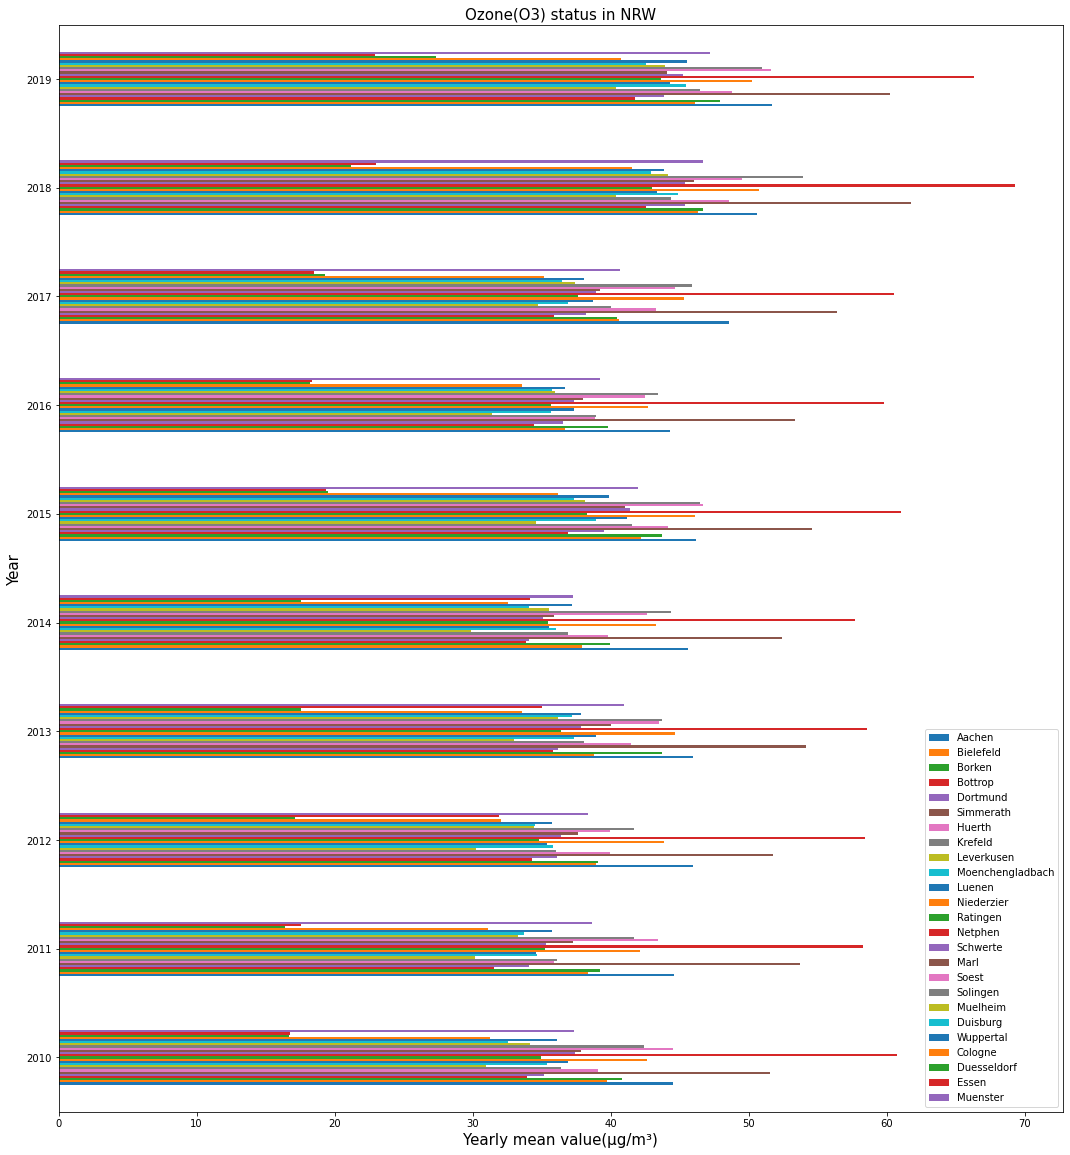

In [30]:
ax = odf2.plot(kind = "barh",figsize=(18,20), fontsize=10)
ax.set_xlabel("Yearly mean value(µg/m³)",fontsize=15)
ax.set_ylabel("Year",fontsize=15)
ax.set_title("Ozone(O3) status in NRW",fontsize=15)
fig = ax.get_figure()   
fig.savefig('O3.png')